In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# . Load the dataset into python environment

In [321]:
data = pd.read_csv('titanic_dataset.csv')

In [322]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [323]:
data.set_index('PassengerId',inplace=True)

In [324]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [325]:
#Basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [326]:
#rows and columns in dataset
data.shape

(891, 11)

In [327]:
#columns names in the dataset
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [328]:
#null values in dataset
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

age,cabin and embarkded columns have null values

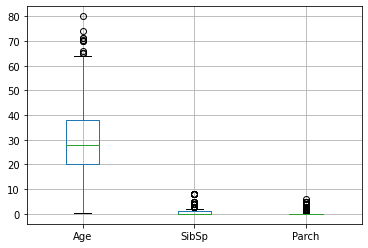

In [329]:
boxplot = data.boxplot(column=['Age', 'SibSp', 'Parch'])

from the above boxplot we have concluded that age,sibsp and parch have outliers

# 4.Fill in all the missing values present in all the columns in the dataset

In [330]:
#Replacing the null values of Embarked with Mode value
data['Embarked']=data['Embarked'].fillna(data["Embarked"].mode()[0])

In [331]:
#Finding Unique values in Cabin
data.Cabin.nunique()

147

In [332]:
#Since more than half of the values are null and the most of the remaining are unique values,we can drop Cabin

In [333]:
data= data.drop('Cabin', axis=1)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [334]:
#Filling the null values of Age with mean
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [335]:
#Checking if all null values are filled
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5.Check and handle outliers in at least 3 columns in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x275e883cc40>,
 'caps': [<matplotlib.lines.Line2D at 0x275e8848220>,
 'boxes': [<matplotlib.lines.Line2D at 0x275e883c970>],
 'medians': [<matplotlib.lines.Line2D at 0x275e88487c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x275e8848a90>],
 'means': []}

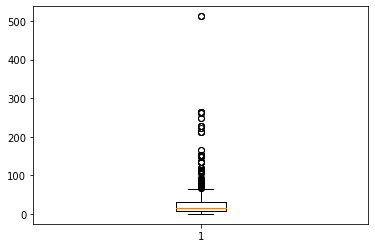

In [336]:
#Checking outliers
plt.boxplot(data['Fare'])

In [337]:
#Removing outliers from Fare
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print("Q1=",Q1,'\nQ2=',Q2,'\nQ3=',Q3)
IQR=Q3-Q1
print("IQR=",IQR)

#lower and Upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("lower limit is",low_lim)
print("Upper limit is",up_lim)

Q1= 7.9104 
Q2= 14.4542 
Q3= 31.0
IQR= 23.0896
lower limit is -26.724
Upper limit is 65.6344


In [338]:
outlier=[]
for x in data['Fare']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [339]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [340]:
ind1=data['Fare']>up_lim
ind_new=data.loc[ind1].index

In [341]:
for i in ind_new:
    data.drop([i],inplace=True)

In [342]:
outlier=[]
for x in data['Fare']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)


In [343]:
outlier

[]

{'whiskers': [<matplotlib.lines.Line2D at 0x275e88a5310>,
 'caps': [<matplotlib.lines.Line2D at 0x275e88a58b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x275e88a5040>],
 'medians': [<matplotlib.lines.Line2D at 0x275e88a5e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x275e88b2160>],
 'means': []}

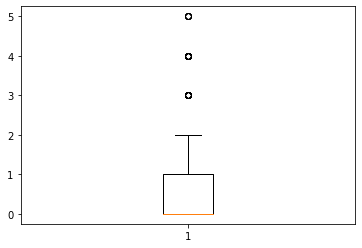

In [344]:
#Checking Outliers
plt.boxplot(data['SibSp'])

In [345]:
#Removing outliers from SibSp
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print("Q1=",Q1,'\nQ2=',Q2,'\nQ3=',Q3)
IQR=Q3-Q1
print("IQR=",IQR)

#lower and Upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("lower limit is",low_lim)
print("Upper limit is",up_lim)

Q1= 0.0 
Q2= 0.0 
Q3= 1.0
IQR= 1.0
lower limit is -1.5
Upper limit is 2.5


In [346]:
outlier=[]
for x in data['SibSp']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [347]:
outlier

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [348]:
ind2=(data['SibSp']>up_lim)
ind_new1=data.loc[ind2].index

In [349]:
for i in ind_new1:
    data.drop([i],inplace=True)

In [350]:
outlier=[]
for x in data['SibSp']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [351]:
outlier

[]

{'whiskers': [<matplotlib.lines.Line2D at 0x275e88fbb20>,
 'caps': [<matplotlib.lines.Line2D at 0x275e8908100>,
 'boxes': [<matplotlib.lines.Line2D at 0x275e88fb850>],
 'medians': [<matplotlib.lines.Line2D at 0x275e89086a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x275e8908970>],
 'means': []}

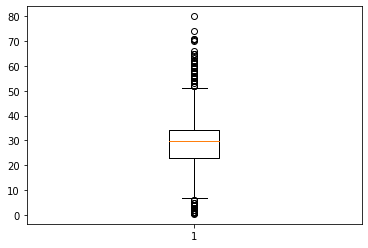

In [352]:
#Checking outliers
plt.boxplot(data['Age'])

In [353]:
#Removing outliers from Age
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print("Q1=",Q1,'\nQ2=',Q2,'\nQ3=',Q3)
IQR=Q3-Q1
print("IQR=",IQR)

#lower and Upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("lower limit is",low_lim)
print("Upper limit is",up_lim)

Q1= 23.0 
Q2= 29.69911764705882 
Q3= 34.25
IQR= 11.25
lower limit is 6.125
Upper limit is 51.125


In [354]:
outlier=[]
for x in data['Age']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [355]:
outlier

[54.0,
 4.0,
 58.0,
 55.0,
 66.0,
 3.0,
 65.0,
 5.0,
 0.83,
 59.0,
 71.0,
 70.5,
 55.5,
 61.0,
 1.0,
 56.0,
 1.0,
 4.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 1.0,
 3.0,
 5.0,
 52.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 4.0,
 61.0,
 57.0,
 80.0,
 0.75,
 56.0,
 70.0,
 60.0,
 4.0,
 60.0,
 52.0,
 52.0,
 6.0,
 4.0,
 6.0,
 0.67,
 57.0,
 54.0,
 5.0,
 1.0,
 0.42,
 1.0,
 0.83,
 74.0,
 4.0]

In [356]:
ind2=(data['Age']>up_lim)
ind_new1=data.loc[ind2].index

In [357]:
for i in ind_new1:
    data.drop([i],inplace=True)

In [358]:
ind3=(data['Age']<low_lim)
ind_new2=data.loc[ind3].index
for i in ind_new2:
    data.drop([i],inplace=True)

In [359]:
outlier=[]
for x in data['Age']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [360]:
outlier

[]

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [361]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [362]:
from sklearn import preprocessing

In [363]:
x=data.iloc[:,[1,4,5,6,8]]
y=data['Survived']
from sklearn.model_selection import train_test_split
from sklearn import linear_model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction= model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,prediction))
from sklearn.metrics import r2_score
print('R squared value is',r2_score(y_test,prediction))
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))

MSE is 0.2128192122291654
R squared value is 0.06544833093986469


In [364]:
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
x= min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4
count,667.000000,667.000000,667.000000,667.000000,667.000000
mean,0.751124,0.507035,0.129685,0.042729,0.253975
std,0.361816,0.192675,0.243634,0.125089,0.205045
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.386364,0.000000,0.000000,0.120834
50%,1.000000,0.515889,0.000000,0.000000,0.161538
75%,1.000000,0.590909,0.000000,0.000000,0.357692
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [365]:
from sklearn.preprocessing import MinMaxScaler
Survived_transf = MinMaxScaler().fit(data['Survived'].values.reshape(-1, 1))
data['Survived'] = Survived_transf.transform(data['Survived'].values.reshape(-1, 1))
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,0.328336,2.502249,29.309536,0.259370,0.256372,16.508370
std,0.469960,0.723632,8.477697,0.487269,0.750536,13.327935
min,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,24.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,29.699118,0.000000,0.000000,10.500000
75%,1.000000,3.000000,33.000000,0.000000,0.000000,23.250000
max,1.000000,3.000000,51.000000,2.000000,6.000000,65.000000
